Here, we will compare the two time sections, between 1620-1629 and 1632-1640+. First, we will do the initial analysis comparison on that time span.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import cleantools as clnt
import logistic as lg
import mapping_tool as mt

# Load Necessary Frames
the_table = clnt.loadPickle("../data/pickles/table_of_all.pkl")
pre_plague = clnt.betweenYears(the_table, 1620, e_year=1629).copy()
post_plague = clnt.betweenYears(the_table, 1632, e_year=1641).copy()
provenance_sector_profession = the_table[["Apprentice Province", "Apprentice Profession", "Contract Date",
                                          "P", "S", "T"]].copy()

 # Total Contract Counts #

Here I check the number of contracts per time window.

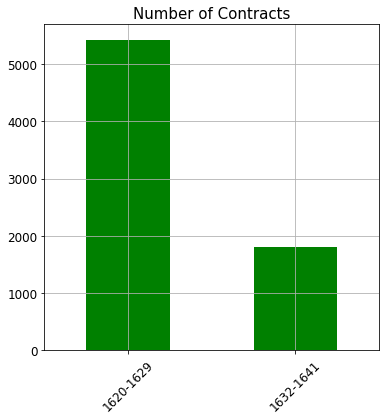

In [3]:
# Create a data frame of size
sizes = pd.DataFrame([[len(pre_plague)], [len(post_plague)]],
                     columns=["Number of Contracts"],
                     index=["1620-1629", "1632-1641"])

# Plot
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Number of Contracts", fontsize=15)
sizes.plot(kind="bar", ax=ax, rot = 45, grid = True,
           fontsize=12, legend = False, color="green")
plt.show()

# Age Distribution #

Now I plot the distribution of age columns in both time windows.

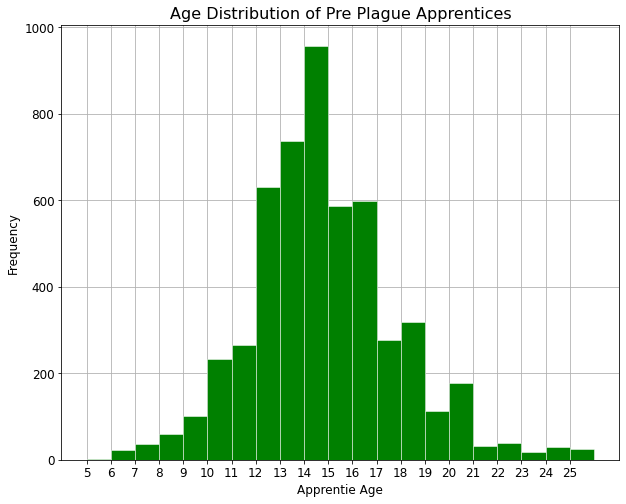

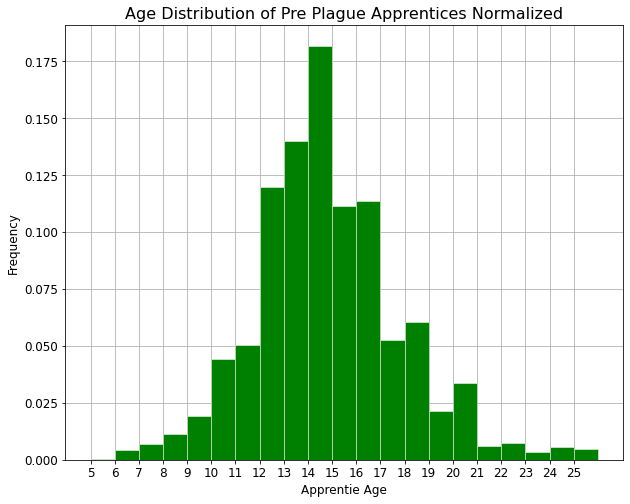

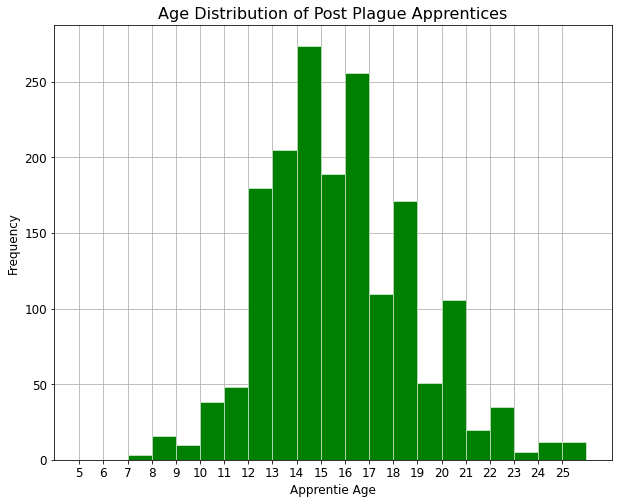

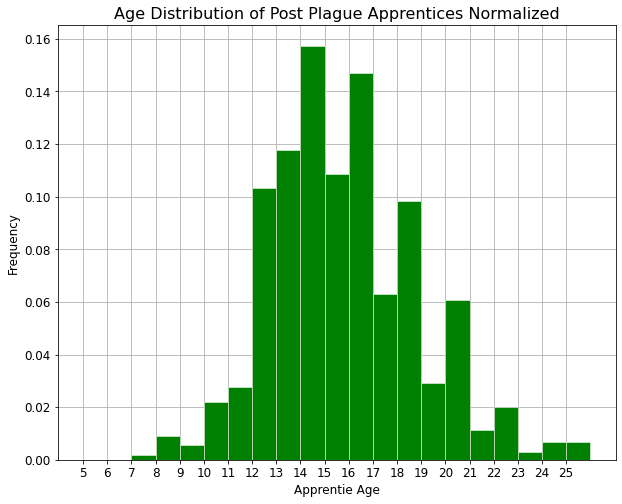

In [35]:
def plotAge(plague_df, title, **kwarg):
    """ Takes in a dataframe and title, plots the histogram of column 'Apprentice Age'
    in the data frame"""
    # Minimum and maximum ages
    maximum = 26
    minimum = 5
    
    # Set the plot object
    _, ax = plt.subplots(figsize=(10, 8))
    
    # Set title and axis lines
    ax.set_title(title, fontsize=16)
    
    # Set axis details
    ax.set_axisbelow(True)
    ax.set_xlabel("Apprentie Age", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    
    # Plot with exact bins
    plague_df["Apprentice Age"].plot(kind="hist", ax=ax,
                  range=[minimum, maximum], edgecolor='white', linewidth=0.5,
                  bins=maximum - minimum, color = "green", xticks = range(minimum,maximum),
                  grid=True, fontsize=12, **kwarg)
    plt.show()
    

# Plotting
plotAge(pre_plague, "Age Distribution of Pre Plague Apprentices")
plotAge(pre_plague, "Age Distribution of Pre Plague Apprentices Normalized", density=1)

plotAge(post_plague, "Age Distribution of Post Plague Apprentices")
plotAge(post_plague, "Age Distribution of Post Plague Apprentices Normalized", density=1)

# Apprentices Per Sector Over Time #

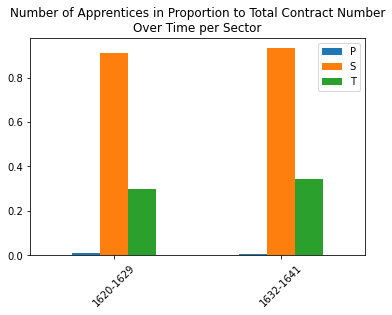

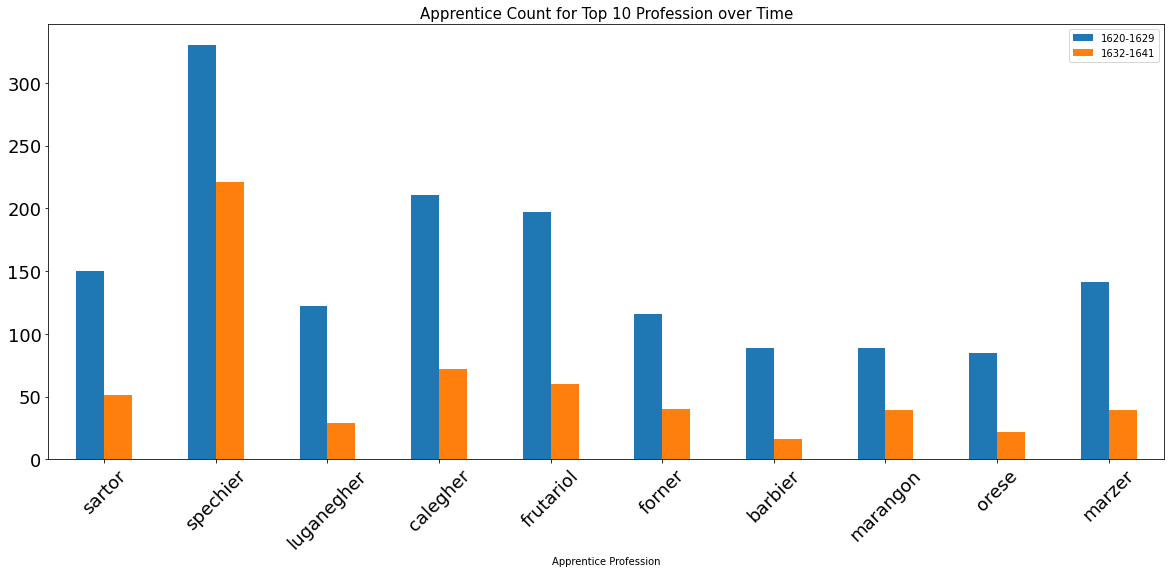

In [30]:
# Constants
start = 1620
end = 1640
gap = 9
gap2 = 12

# We recurse through the time windows, and store them on a data frame
df = pd.DataFrame(columns = ["P", "S", "T"])
for year in range(start, end, gap2):
    temp = clnt.betweenYears(provenance_sector_profession, year, e_year = year + gap)
    df = df.append(pd.Series(temp[["P", "S", "T"]].sum().apply(lambda x:x/len(temp)), name = f"{year}-{year+gap}"))    

# Plotting
df.plot(kind="bar",
        rot=45,
        title="Number of Apprentices in Proportion to Total Contract Number\nOver Time per Sector")
plt.show()

# Then we look in profession scale, and do something similar
df = pd.DataFrame({"Apprentice Profession": provenance_sector_profession["Apprentice Profession"].unique()})
for year in range(start, end, gap2):
    temp = clnt.betweenYears(provenance_sector_profession, year, e_year = year + gap)
    groups = temp.groupby("Apprentice Profession")[["Apprentice Profession"]].agg("count").copy()
    groups.columns = [f"{year}-{year+gap}"]
    df = df.merge(groups, on="Apprentice Profession", how = "left")

# Group according to professions
groups = provenance_sector_profession.groupby("Apprentice Profession")[["Apprentice Profession"]].agg("count").copy()
groups.columns = ["Total"]

# Merge to main data frame
df = df.merge(groups, on="Apprentice Profession", how = "left")
df = df[df["Apprentice Profession"].notna()]
df = df.set_index("Apprentice Profession")

# Plot
_, ax = plt.subplots(figsize=(20,8))
ax.set_title("Apprentice Count for Top 10 Profession over Time", fontsize=15)
df.sort_values("Total", ascending = False)[:10][df.keys()[:-1]].plot(kind='bar',
                                                                     ax=ax,
                                                                     fontsize=18,
                                                                     rot=45)
plt.show()

# Gender Against Tag #

Here, I compare the number of tags like guarantor, master and apprentice against the gender for both time windows.

In [32]:
def genderCount(df, name):
    """Takes a data frame, and a gender name, plots the tag counts, and gives a table."""
    fig, ax = plt.subplots()
    ax.set_title(f"{name.title()} Tag Distribution Per Period", fontsize= 15)
    df.plot(kind="bar", grid = True, rot=45, ax=ax, fontsize=12)
    plt.show()
    
    df = df.copy().transpose()
    df["Proportional Decrease"] = df["1620-1629"] / df["1632-1641"]
    df["Real Difference"] = df["1620-1629"] - df["1632-1641"]
    return df

In [35]:
# Load Frames
sub_tables_ug = clnt.loadPickle("../data/pickles/sub_tables.pkl")

# Merge with necessary times
sub_tables_ug = sub_tables_ug.merge(the_table.reset_index()[["Contract ID", "Contract Date"]],
                                    on="Contract ID")[["Contract ID", "Gender",
                                                       "Is Guarantor", "Is Master",
                                                       "Is Apprentice", "Is Other",
                                                       "Contract Date"]]

# Get time windows
pre_plague_g_n_t = clnt.betweenYears(sub_tables_ug, 1620, e_year=1629).copy()
pos_plague_g_n_t = clnt.betweenYears(sub_tables_ug, 1632, e_year=1641).copy()


# Get male and female counts
fem_plague_counts = pd.DataFrame([pre_plague_g_n_t.loc[pre_plague_g_n_t["Gender"] == "grz:Female",
                                                       ["Is Guarantor", "Is Master", "Is Apprentice",
                                                        "Is Other"]].sum(),
                                  pos_plague_g_n_t.loc[pos_plague_g_n_t["Gender"] == "grz:Female",
                                                       ["Is Guarantor", "Is Master", "Is Apprentice",
                                                        "Is Other"]].sum()],
                                  index=["1620-1629", "1632-1641"])

mal_plague_counts = pd.DataFrame([pre_plague_g_n_t.loc[pre_plague_g_n_t["Gender"] == "grz:Male",
                                                       ["Is Guarantor", "Is Master", "Is Apprentice",
                                                        "Is Other"]].sum(),
                                  pos_plague_g_n_t.loc[pos_plague_g_n_t["Gender"] == "grz:Male",
                                                       ["Is Guarantor", "Is Master", "Is Apprentice",
                                                        "Is Other"]].sum()],
                                  index=["1620-1629", "1632-1641"])



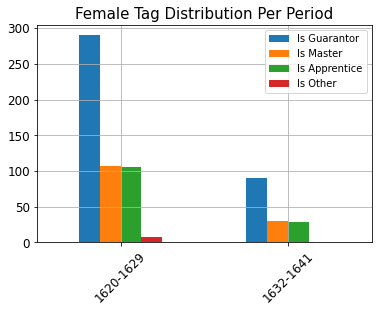

,1620-1629,1632-1641,Proportional Decrease,Real Difference
Is Guarantor,290,90,3.222222,200
Is Master,107,30,3.566667,77
Is Apprentice,106,28,3.785714,78
Is Other,8,0,inf,8


In [36]:
# Plot females
genderCount(fem_plague_counts, "female")

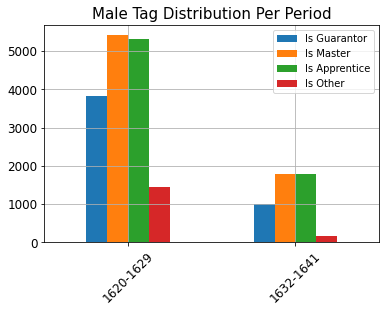

,1620-1629,1632-1641,Proportional Decrease,Real Difference
Is Guarantor,3830,1010,3.792079,2820
Is Master,5414,1793,3.019520,3621
Is Apprentice,5310,1777,2.988182,3533
Is Other,1442,162,8.901235,1280


In [37]:
# Plot males
genderCount(mal_plague_counts, "male")

# Mapping the Geo Distributions #

Here I plot the geographical distributions of apprentices per time window.

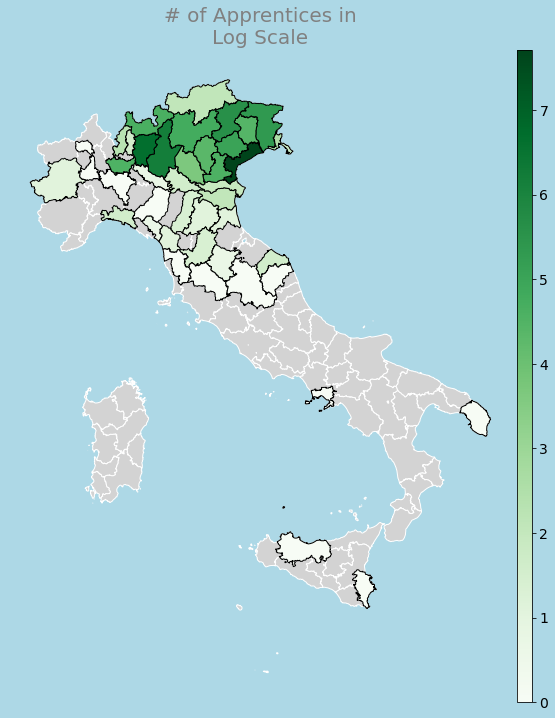

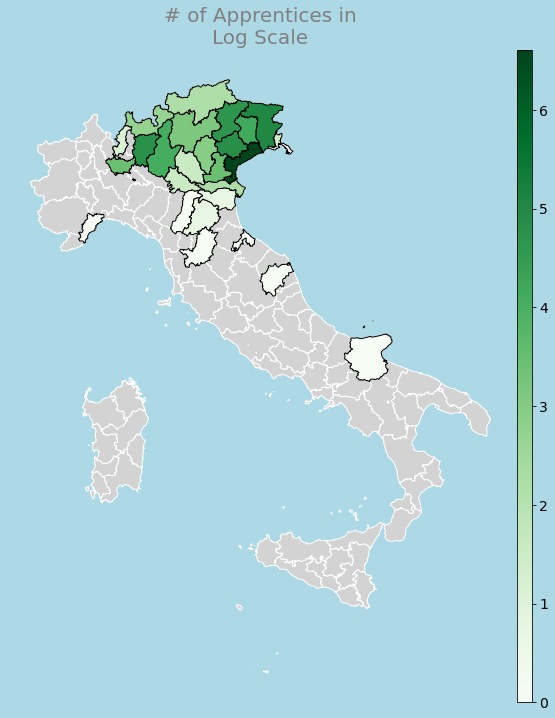

In [39]:
mt.filterNmap(the_table, s_year=1620, e_year=1629)
mt.filterNmap(the_table, s_year=1632, e_year=1641)

# Average Wage of Ducati Payments #

In order to not get affected by different currency values, here I compare the payments made in ducati to see a payment distribution.

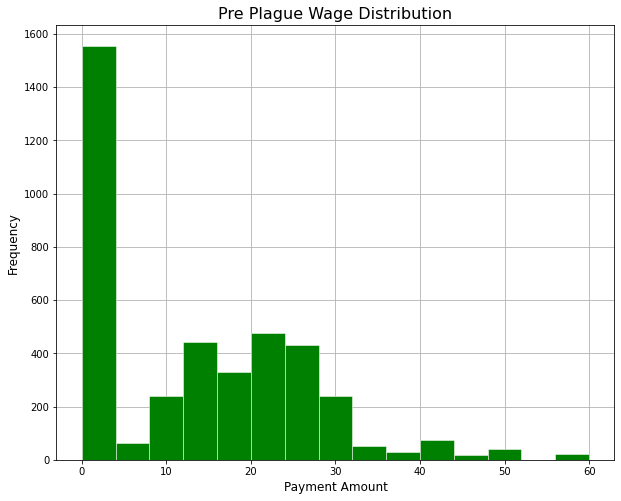

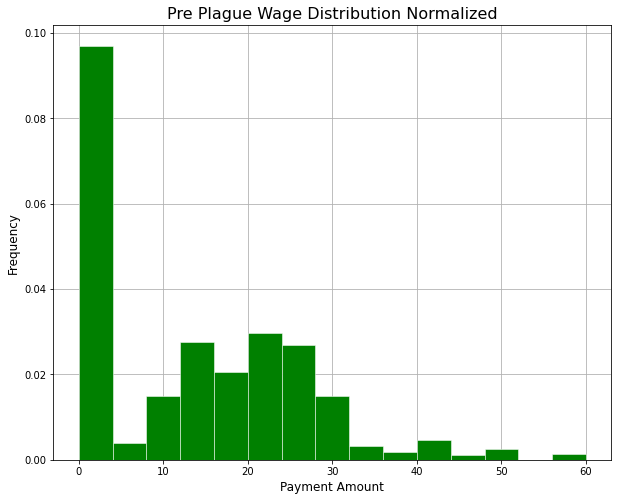

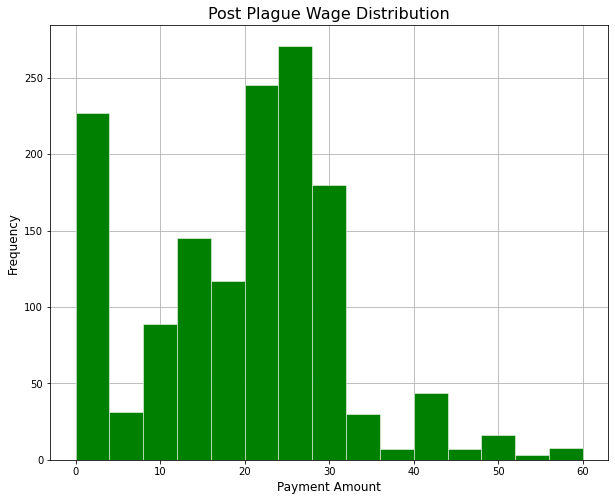

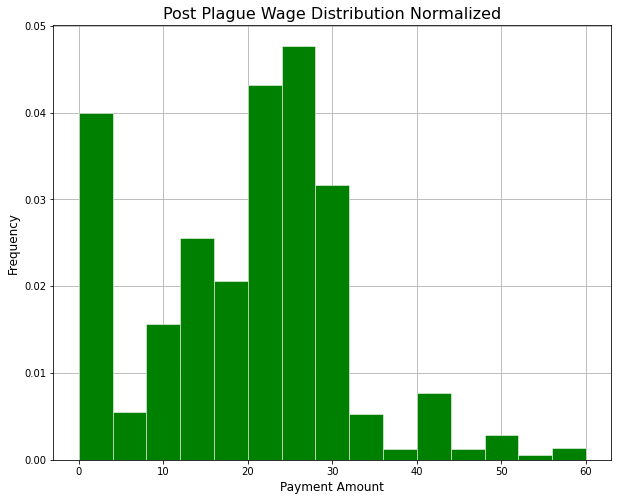

In [38]:
# Load Frames
pre = pre_plague.loc[pre_plague["Has Ducati"] == 1, ["Total Payment Received"]].copy().dropna()
pos = post_plague.loc[post_plague["Has Ducati"] == 1, ["Total Payment Received"]].copy().dropna()

# Function to plot
def plotWage(plague_df, title, **kwarg):
    """ Takes in a dataframe and title, plots the histogram of column 'Has ducati'
    in the data frame"""
    # Set the plot object
    _, ax = plt.subplots(figsize=(10, 8))
    
    # Set title and axis lines
    ax.set_title(title, fontsize=16)
    
    # Set axis details
    ax.set_axisbelow(True)
    ax.set_xlabel("Payment Amount", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    
    # Plot with exact bins
    plague_df.astype(int).plot(kind="hist", ax=ax, color="green", bins= 15,
                               range=[0,60], grid=True, legend=False,
                               edgecolor='white', linewidth=0.5, **kwarg)
    plt.show()


# Plotting
plotWage(pre, "Pre Plague Wage Distribution")
plotWage(pre, "Pre Plague Wage Distribution Normalized", density=1)

plotWage(pos, "Post Plague Wage Distribution")
plotWage(pos, "Post Plague Wage Distribution Normalized", density=1)

# Logistic Regression to Estimate Pre or Post Plague #

Here, in order to see further correlations, we will apply logistic regression on rest of the features of a contract, to guess whether a contract is pre or post plague. Unlike the last logistic regression, category and parent label columns are not as unbalanced, so we don't need to create a baseline, and in fact, the calculations work better without the base line assumption.

In [2]:
# Load Frames
categories = clnt.loadPickle("../data/pickles/generated_categories_appRel_femCon_fromVen.pkl")
del categories["From Venezia"]
new_table = the_table.join(categories)

In [3]:
# Prepare the target column
pre = clnt.betweenYears(new_table, 1620, e_year=1629).copy()
pos = clnt.betweenYears(new_table, 1632, e_year=1641).copy()
pre["After_Plague"] = 0
pos["After_Plague"] = 1
new_table = pd.concat([pre, pos]).copy()
new_table = lg.dummyLabels(new_table)

# Get the regression object
reg = lg.myRegressor(column_list = [
    'Has BoContract',
    'Has Flee',
    'Has Single Salary',
    'Has Master Paying Salary',
    'Has Whole Period',
    'Has Ducati',
    'Master Paid Accom',
    'Master Paid Clothing',
    'Quondam1',
    'Master Paid Gen. Exp.',
    'Master Paid Per. Care',
    'Apprentice Age',
    'Apprentice Male',
    'S',
    'T',
    'P',
    'Duration - Merged',
    'Paid Salary in Goods',
    'Total Payment Received',
    'After_Plague',
    'From Venezia',
    'Has Apprentice Relation',
    'Has Female in Contract',
#     'Category',
    "prod. e lav. di tessuti e filati",
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature",
    "lav. di metalli comuni"])

reg.loadData(new_table, "After_Plague", has_date="", outlier_list=[])
reg.x_data.columns = [a.replace(" - ", "_").replace("'", "_").replace(".", "").replace(" ", "_") for a in reg.x_data.columns]

Before drop na columns 7226
Before outlier clean 3264
Total Size 3264
Training Size 2448
Number of 1s in target 884
Number of 0s in target 1564


In [82]:
# Experimental: Create four different salary tags
# financials = clnt.loadPickle(
#     "../data/pickles/clean_Financial.pkl"
# )[["Contract ID", "Tag"]].set_index("Contract ID")
# financials.columns = ["Salary_Type"]
# reg.x_data = reg.x_data.join(financials)
# reg.column_list.append("Salary_Type")

In [4]:
formula = ("After_Plague ~ " +
           " + ".join(reg.x_data.columns) +
#            " + C(Salary_Type, Treatment('grz:SingleSalary'))"
           " + From_Venezia:(" + " + ".join(reg.x_data.columns[-6:]) +
           ")")
reg.formula = formula

Optimization terminated successfully.
         Current function value: 0.525421
         Iterations 6
                                         Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.194      
Dependent Variable:           After_Plague               AIC:                        3499.9455  
Date:                         2020-07-21 22:11           BIC:                        3713.1203  
No. Observations:             3264                       Log-Likelihood:             -1715.0    
Df Model:                     34                         LL-Null:                    -2127.5    
Df Residuals:                 3229                       LLR p-value:                2.4261e-151
Converged:                    1.0000                     Scale:                      1.0000     
No. Iterations:               6.0000                                                            
------------------------------------------------------------------

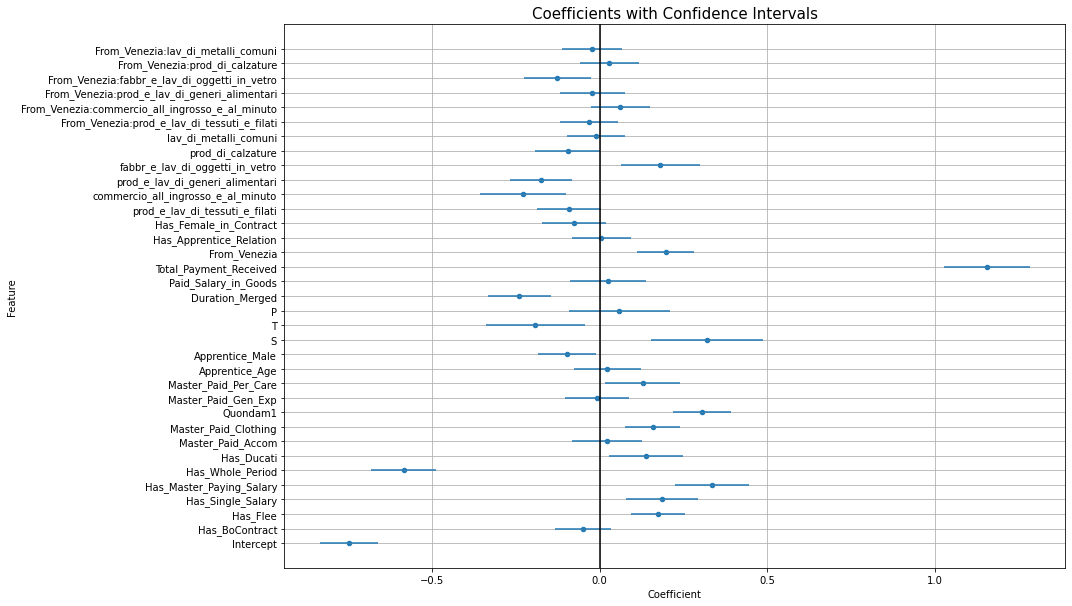

In [5]:
reg.getReport()

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       534
           1       0.72      0.52      0.60       282

    accuracy                           0.76       816
   macro avg       0.75      0.71      0.72       816
weighted avg       0.76      0.76      0.75       816



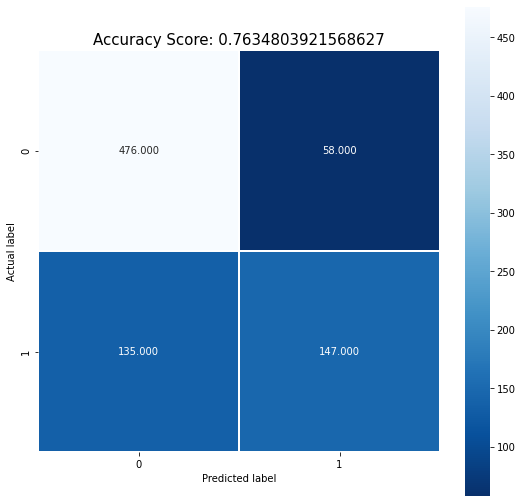

In [6]:
reg.applyLogistic()

Oversample Size 3128
Number of 1s in target 1564
Number of 0s in target 1564
Optimization terminated successfully.
         Current function value: 0.525421
         Iterations 6
                                         Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.194      
Dependent Variable:           After_Plague               AIC:                        3499.9455  
Date:                         2020-07-21 22:11           BIC:                        3713.1203  
No. Observations:             3264                       Log-Likelihood:             -1715.0    
Df Model:                     34                         LL-Null:                    -2127.5    
Df Residuals:                 3229                       LLR p-value:                2.4261e-151
Converged:                    1.0000                     Scale:                      1.0000     
No. Iterations:               6.0000                                                  

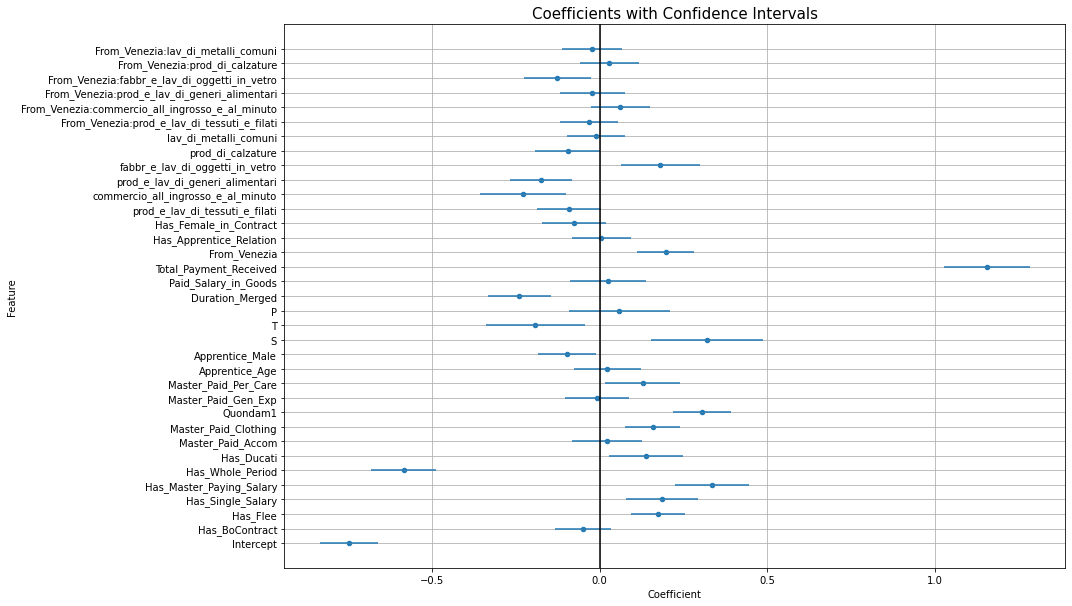

In [7]:
reg.overSample()
reg.getReport()

In [9]:
# reg.selectFeatures()
# reg.getReport()